In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../build/lib.linux-x86_64-3.6/')
from pymcc_lidar import classify, calculate_excess_height

In [3]:
from pymccrgb.ioutils import read_las

In [4]:
data = read_las('data/points_rgb.laz', nrows=10000)[:, 0:3]

In [5]:
data.shape

(10000, 3)

In [6]:
scale = 1.0
tol = 0.3

In [7]:
dz = calculate_excess_height(data.copy(order='C'), scale)
np.save('output/height_1iter_s1_t0_3_gs_1000iter_addeps.npy', dz)

In [8]:
labels = classify(data.copy(order='C'), scale, tol)
np.save('output/labels_s1_t0_3_gs_1000iter_addeps.npy', labels)

In [9]:
dz_true = np.load('output/height_1iter_s1_t0_3_lu.npy')
labels_true = np.load('output/labels_s1_t0_3_lu.npy')

Text(0.5, 1.0, 'LU result')

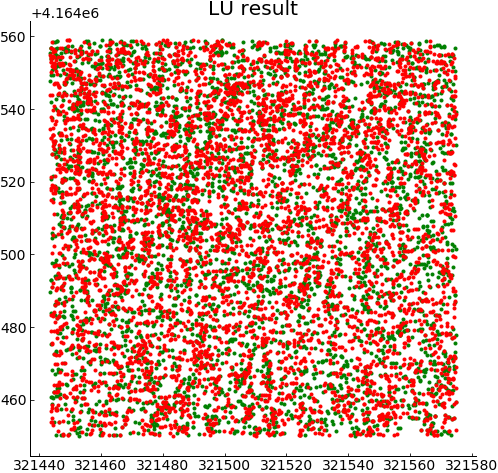

In [10]:
plt.plot(data[labels_true == 1, 0], data[labels_true == 1, 1], 'g.')
plt.plot(data[labels_true == 2, 0], data[labels_true == 2, 1], 'r.')
plt.title('LU result')

Text(0, 0.5, 'G-S $\\Delta$z')

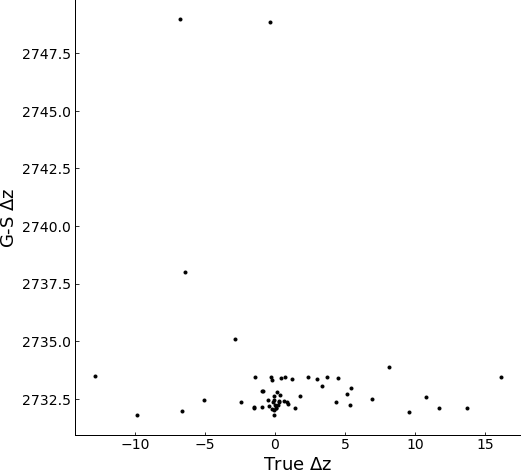

In [11]:
plt.plot(dz_true, dz, 'k.')
plt.xlabel('True $\Delta$z')
plt.ylabel('G-S $\Delta$z')

Text(0.5, 1.0, 'G-S result (1000 iters)')

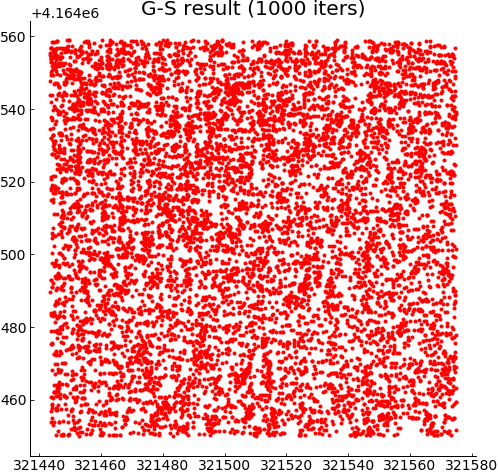

In [12]:
plt.plot(data[labels == 1, 0], data[labels == 1, 1], 'g.')
plt.plot(data[labels == 2, 0], data[labels == 2, 1], 'r.')
plt.title('G-S result (1000 iters)')

In [13]:
dz = np.load('output/height_1iter_s1_t0_3_donothing.npy')
labels = np.load('output/labels_s1_t0_3_donothing.npy')

Text(0, 0.5, '$\\Delta$z from no computation')

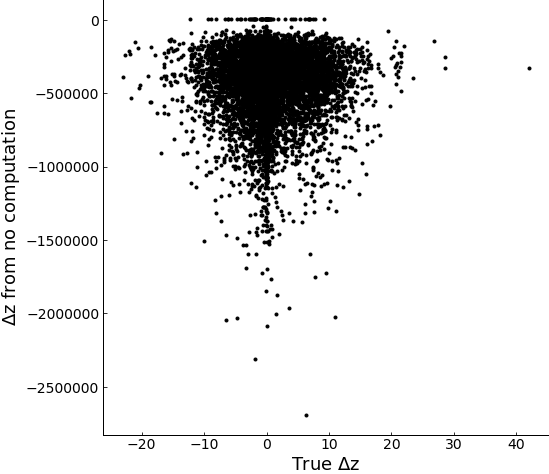

In [14]:
plt.plot(dz_true, dz, 'k.')
plt.xlabel('True $\Delta$z')
plt.ylabel('$\Delta$z from no computation')

Text(0.5, 1.0, 'no computation')

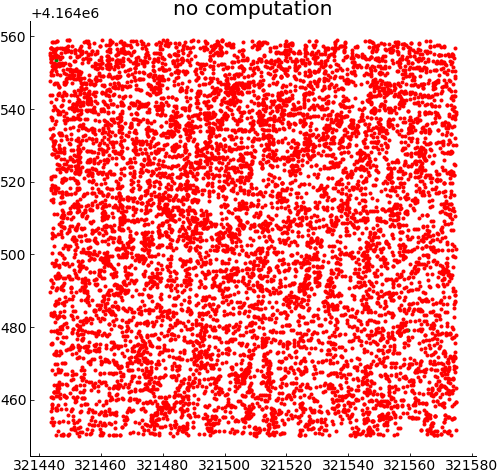

In [15]:
plt.plot(data[labels == 1, 0], data[labels == 1, 1], 'g.')
plt.plot(data[labels == 2, 0], data[labels == 2, 1], 'r.')
plt.title('no computation')

Text(0, 0.5, 'G-S $\\Delta$z')

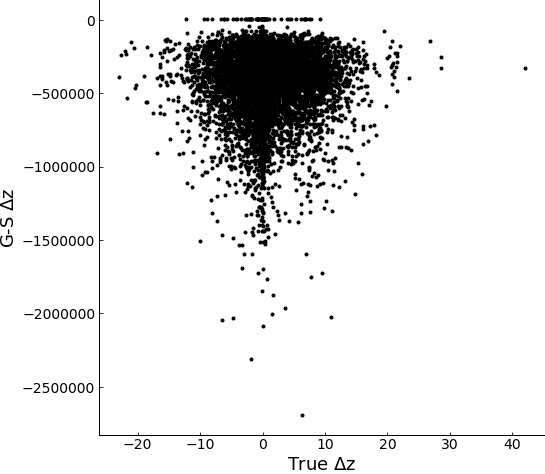

In [16]:
plt.plot(dz_true, dz, 'k.')
plt.xlabel('True $\Delta$z')
plt.ylabel('G-S $\Delta$z')